<a href="https://colab.research.google.com/github/Karmegha-Kuzhali/Thirukkural_analysis/blob/main/Thirukkural_anal_transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sentence_transformers import SentenceTransformer, util
from sentence_transformers.evaluation import TranslationEvaluator
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neural_network import MLPClassifier,MLPRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans,kmeans_plusplus,AgglomerativeClustering
from sklearn.svm import SVC
from scipy.stats import chi2_contingency
from collections import Counter
from scipy.stats import entropy
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
trf = SentenceTransformer('paraphrase-multilingual-mpnet-base-v2')

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.90k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/723 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/402 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/thirukkural analysis/data/Thirukural.csv")

In [ ]:
df.head()

,Chapter Name,Section Name,Verse,Translation
0,அறத்துப்பால்,கடவுள் வாழ்த்து,அகர\tமுதல\tஎழுத்தெல்லாம்\tஆதி\t\t\tபகவன்\tமுதற...,"A, as its first of letters, every speech maint..."
1,அறத்துப்பால்,கடவுள் வாழ்த்து,கற்றதனால்\tஆய\tபயனென்கொல்\tவாலறிவன்\t\t\tநற்றா...,"No fruit have men of all their studied lore, S..."
2,அறத்துப்பால்,கடவுள் வாழ்த்து,மலர்மிசை\tஏகினான்\tமாணடி\tசேர்ந்தார்\t\t\tநிலம...,"His feet, 'Who o'er the full-blown flower hath..."
3,அறத்துப்பால்,கடவுள் வாழ்த்து,வேண்டுதல்\tவேண்டாமை\tஇலானடி\tசேர்ந்தார்க்கு\t\...,"His foot, 'Whom want affects not, irks not gri..."
4,அறத்துப்பால்,கடவுள் வாழ்த்து,இருள்சேர்\tஇருவினையும்\tசேரா\tஇறைவன்\t\t\tபொரு...,"The men, who on the 'King's' true praised deli..."


In [ ]:
embeddings_Tam = trf.encode(df['Verse'].tolist(), convert_to_tensor=False)
embeddings_english = trf.encode(df['Translation'].tolist(), convert_to_tensor=False)

In [ ]:
lr=LinearRegression()

In [ ]:
X,y=embeddings_Tam,embeddings_english

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=39)

In [ ]:
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
lr.score(X_train,y_train)

0.8014249801635742

In [ ]:
lr.score(X_test,y_test)

-6.1711249351501465

<Strong>First time seeing a negative score</strong>

In [ ]:
nn=MLPRegressor()

In [ ]:
nn.fit(X_train,y_train)

MLPRegressor()

In [ ]:
nn.score(X_train,y_train)

0.02597992867231369

In [ ]:
nn.score(X_test,y_test)

0.0022406578063964844

In [ ]:
pc=PCA(n_components=2)

In [ ]:
decomp_tamil=pc.fit_transform(embeddings_Tam)

In [ ]:
decomp_eng=pc.fit_transform(embeddings_english)

In [ ]:
unique_chapters = df['Chapter Name'].unique()
colors = plt.cm.Set1(np.linspace(0, 1, len(unique_chapters)))
chapter_color_map = dict(zip(unique_chapters, colors))

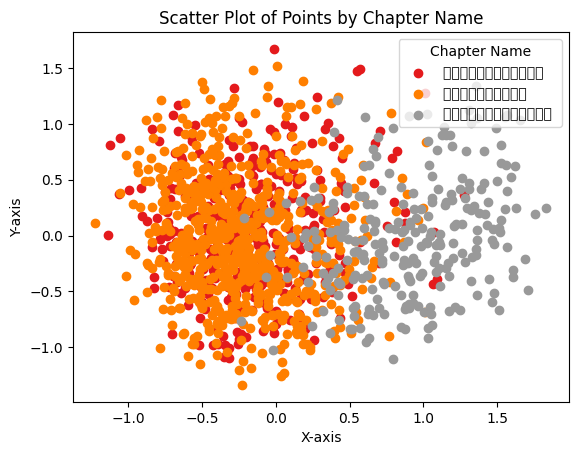

In [ ]:
unique_chapters = df['Chapter Name'].unique()
colors = plt.cm.Set1(np.linspace(0, 1, len(unique_chapters)))
chapter_color_map = dict(zip(unique_chapters, colors))

# Plot each chapter's points with its corresponding color
for chapter in unique_chapters:
    mask = df['Chapter Name'] == chapter
    plt.scatter(decomp_eng[mask, 0], decomp_eng[mask, 1], color=chapter_color_map[chapter], label=chapter)

plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend(title="Chapter Name")
plt.title("Scatter Plot of Points by Chapter Name")
plt.show()

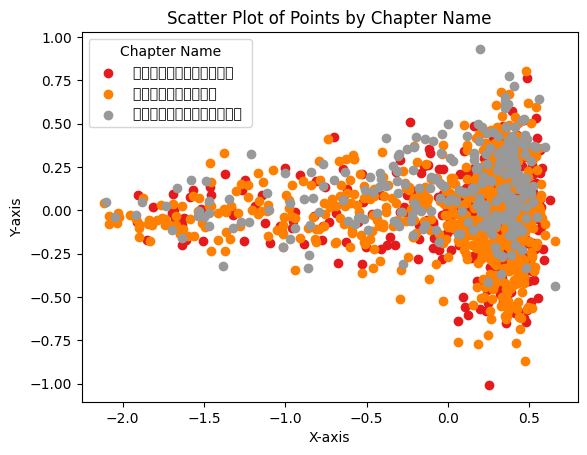

In [ ]:
unique_chapters = df['Chapter Name'].unique()
colors = plt.cm.Set1(np.linspace(0, 1, len(unique_chapters)))
chapter_color_map = dict(zip(unique_chapters, colors))

# Plot each chapter's points with its corresponding color
for chapter in unique_chapters:
    mask = df['Chapter Name'] == chapter
    plt.scatter(decomp_tamil[mask, 0], decomp_tamil[mask, 1], color=chapter_color_map[chapter], label=chapter)

plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend(title="Chapter Name")
plt.title("Scatter Plot of Points by Chapter Name")
plt.show()

# Conclusion


After analysing with two notebooks it is pretty evident over why it is quite un-separable

# Classification


In [ ]:
X,y=embeddings_Tam,df['Chapter Name']
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=39)

In [ ]:
nn=MLPClassifier(hidden_layer_sizes=(10,15,10),alpha=3)

In [ ]:
nn.fit(X_train,y_train)

MLPClassifier(alpha=3, hidden_layer_sizes=(10, 15, 10))

In [ ]:
nn.score(X_train,y_train)

0.5997993981945837

In [ ]:
nn.score(X_test,y_test)

0.5705705705705706

In [ ]:
X,y=embeddings_english,df['Chapter Name']
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=39)

In [ ]:
nn=MLPClassifier(hidden_layer_sizes=(100,100,100),alpha=10,max_iter=500)

In [ ]:
nn.fit(X_train,y_train)

MLPClassifier(alpha=10, hidden_layer_sizes=(100, 100, 100), max_iter=500)

In [ ]:
nn.score(X_train,y_train)

0.7432296890672017

In [ ]:
nn.score(X_test,y_test)

0.6756756756756757